<h3> Uczenie maszynowe - regresja </h3>

Dziś zajmiemy się praktycznym zastosowaniem algorytmów uczenia maszynowego. Po zapoznaniu się z danymi, oczyszczeniu i ewentualnym uzupełnieniu brakujących wartości przechodzimy do modelowania i ewaluacji. Proces modelowania i ewualuacji <b> powtarza się wielokrotnie </b>, a zamyka jedną ewaluacją końcową.

In [2]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
reg = linear_model.LinearRegression()
x = np.array([0,1,2,2.1,3,3.2,4]).reshape(-1,1)
y = np.array([0,1.1,1.9,2.4,3.1,3.8,3.8])
reg.fit(x,y)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c='k',ls='--')
plt.show()
#coeff

<Figure size 640x480 with 1 Axes>

Regresja to zbiór procesów statystycznych służących do estymacji związku pomiędzy zmienną <b> zależną </b> oraz zmiennymi <b> niezależnymi </b>. Dzięki temu, znając wartości zmiennych niezależnych powiązanych ze zmienną zależną, oszacować możemy wartość zmiennej zależnej.

Metoda ta używana jest w predykcji i prognozach wartości ciągłych.

Tej metody w jej podstawowej wersji już używaliście:

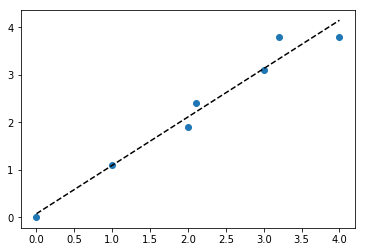

In [2]:
x = np.array([0,1,2,2.1,3,3.2,4]).reshape(-1,1)
y = np.array([0,1.1,1.9,2.4,3.1,3.8,3.8])
plt.scatter(x,y)
y = y.reshape(-1,1)
x = np.hstack((x,np.ones((7,1))))
a,b = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
os_x = np.arange(5)
os_y = a*os_x + b
plt.plot(os_x,os_y, c = 'k', ls = '--')

Najprostszym przykładem jest tak jak powyżej - regresja liniowa. Dwie zmienne wysoce od siebie zależne pozwalają na dobrą estymację wartości nieznanej.

In [3]:
from scipy.stats import pearsonr, spearmanr
x = np.array([0,1,2,2.1,3,3.2,4])
y = np.array([0,1.1,1.9,2.4,3.1,3.8,3.8])
print(pearsonr(x,y))
reg.predict(np.array([[4]]))

(0.982193982518659, 8.04850994199628e-05)


array([4.14689014])

Co jeśli mamy związek nieliniowy?

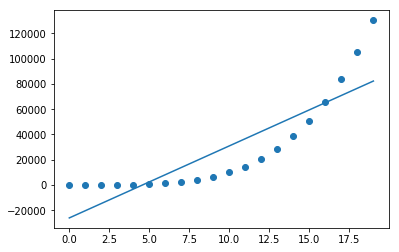

In [4]:
x = np.arange(20).reshape(-1,1)
y = np.array(x**4+x/2).reshape(-1,1)
plt.scatter(x,y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
plt.plot(x, y_pred)

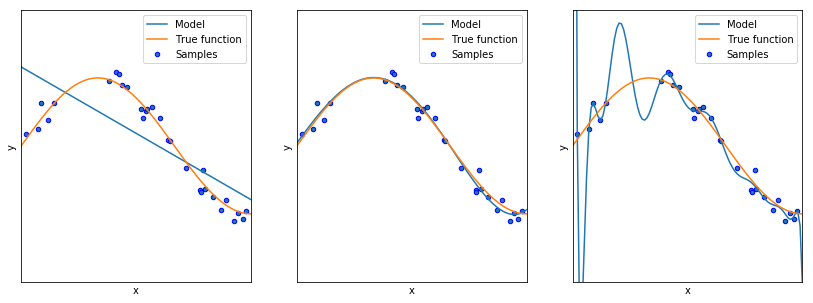

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
plt.show()

Regresja należy do grupy metod <b> nadzorowanych </b>, czyli posiadamy przykłady prawidłowych wyników na podstawie których algorytm uczy się esytmować wartość zmiennej zależnej

<h3> Miary dokładności regresji </h3>

Regresja jako metoda porgnoz ciągłych może być oceniana poprzez odchylenie wyestymowanych wartości od rzeczywistych. Istnieje kilka miar o których warto wspomnieć:

    R2 - procent korelacji podniesionej do kwadratu pomiędzy wyestymowanymi a prawdziwymi wartościami
    MAE - "Mean Absolute Error" - średni błąd absolutny, średnia bezwzględna różnica pomiędzy modelem a prawdziwymi wartościami
    MSE - "Mean Squared Error" - średni błąd kwadratowy, średnia różnica podniesiona do kwadratu 
    RMSE - "Root Mean Squared Error" - jw. ale spierwastkowany
    MedianAE "Median Absolute Error" - miediana błędu absolutnego
    

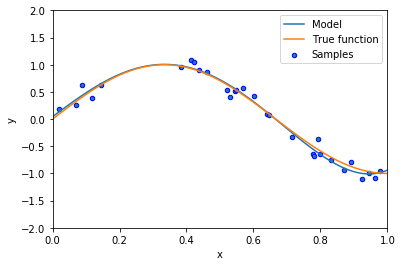

R2: 0.9974005517408685
MAE: 0.027308353371349826
MSE: 0.001276492974065976
MedianAE: 0.016666661521225035


In [51]:
def true_fun(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=4,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

import sklearn.metrics as metrics


print("R2: " + str(metrics.r2_score(pipeline.predict(X_test[:, np.newaxis]), true_fun(X_test))))
print("MAE: " + str(metrics.mean_absolute_error(pipeline.predict(X_test[:, np.newaxis]), true_fun(X_test))))
print("MSE: " + str(metrics.mean_squared_error(pipeline.predict(X_test[:, np.newaxis]), true_fun(X_test))))
print("MedianAE: " + str(metrics.median_absolute_error(pipeline.predict(X_test[:, np.newaxis]), true_fun(X_test))))

<h3> Podział na zbiory i tasowanie danych </h3>

To bardzo ważny etap modelowania danych - każdy zbiór danych musi zostać podzielony na <b> trzy </b> zbiory:

    Uczący
    Walidacyjny
    Testowy

Zbiór uczący wykorzystywany jest podczas trenowania algorymtu, czyli podczas wpasowywania funkcji regresji

Zbiór walidacyjny jest wykorzystywany podczas testów algorytmu, czyli podczas oceny wstępnej naszego algorytmu

Zbiór testowy wykorzystywany jest tylko <b> raz </b> do ostatecznego testu i oceny naszego algorytmu

Dlaczego tak? Hasło: Overfitting


Metody nadzorowane "uczą się" poznając swój błąd (zatem uczą się na błędach) - dzięki przykładom wiedzą jak bardzo się mylą i co należy zmienić. Można to przyrównać do nauki studenta:

    Student się uczy/studiuje robiąc zadania w domu. Po wykonaniu zadania sprawdza odpowiedź - jeśli się zgadza, wiedza jest utrwalana i student wie, że robi zadanie poprawnie. Jeśli nie, poprawia się.
    
    Student przychodzi na kolokwium. Tych pytań nigdy nie widział i nie zna odpowiedzi, przynajmniej nie od razu. Jeśli pójdzie mu dobrze, wie że jest na dobrej drodze. Jeśli nie - trzeba wrócić do domu i znów się uczyć.
    
    Na końcu student przychodzi na egzamin. Ma tylko jedną szansę. Jeśli go obleje - student jest do usunięcia.

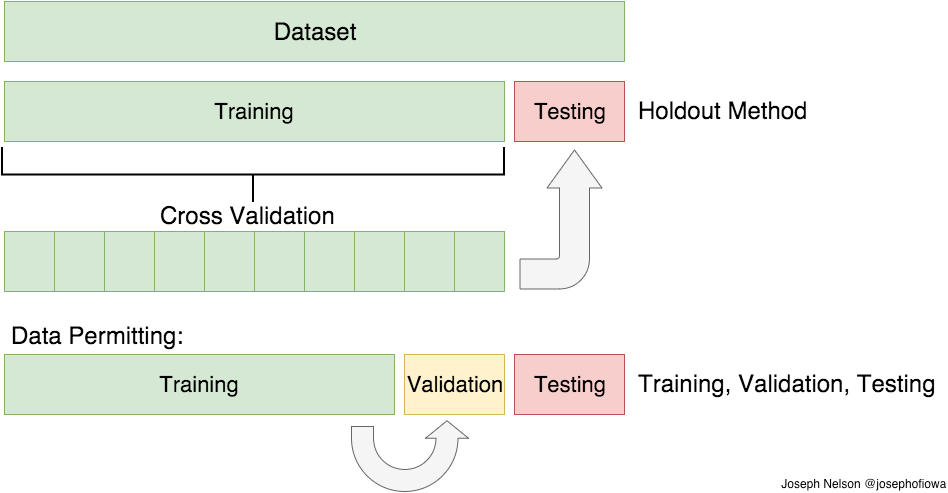

In [53]:
from IPython.display import Image
Image(filename='TVT.png')

<h3> Cross-Validation - czyli sprawdzian krzyżowy </h3>

Ta metoda pozwala na ulepszenie procesu uczenia i testowania. Nie wymaga wydzielania zbioru testowego. Ze zbioru uczącego wydzielane są dwa zbiory (n-złożony sprawdzian krzyżowy) - uczący i testowy. Dane te są wybierane losowo lub według określonych reguł (sprawdzian stratyfikowany, selekcja z serii czasowych) i za każdym razem dzielone na zbiór uczący i testowy. Proces uczenia algorytmu i jego testowania odbywa się na wydzielonych zbiorach. Proces powtarza się n-krotnie.

In [57]:
import pandas as pd
boston = pd.read_csv("boston_clean.csv")

1. Wybierz dane (wybrane podczas ćwiczeń 6) i użyj funkcji https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html by rozbić zbiór na uczący i testowy (tylko dwa bo dokonamy sprawdzianu krzyżowego)

Wynikiem ma być X_uczący, Y_uczący, X_testowy, Y_testowy